In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip

!unzip -qq images.zip

--2022-10-14 15:37:02--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.149.150
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.149.150|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29586716 (28M) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]  28.22M  6.73MB/s    in 4.2s    

2022-10-14 15:37:07 (6.73 MB/s) - ‘images.zip’ saved [29586716/29586716]



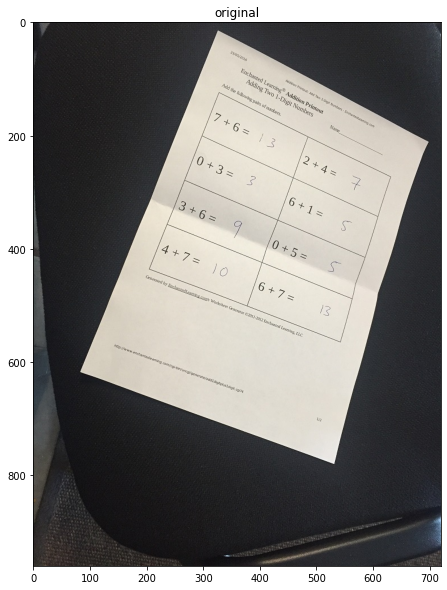

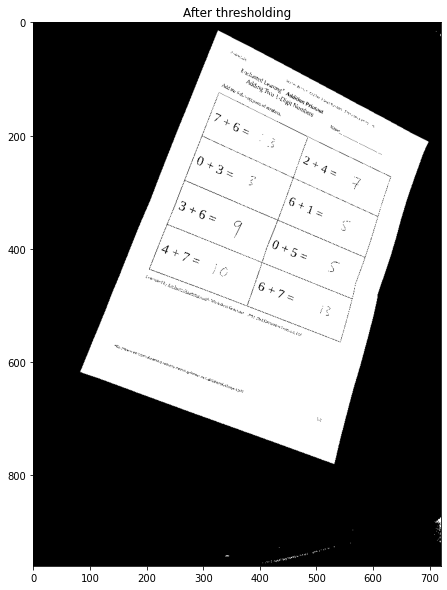

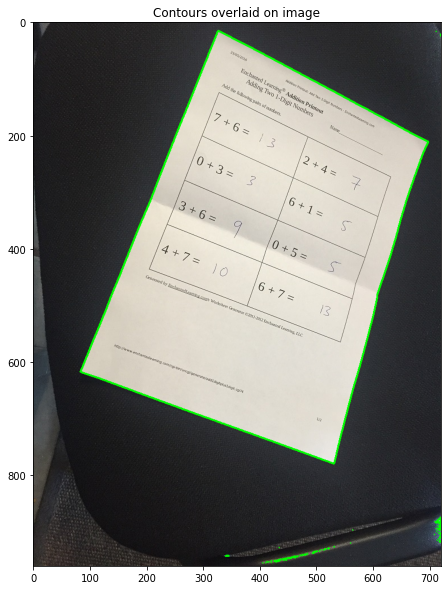

Number of Contours found = 54


In [2]:
image = cv2.imread('/content/images/scan.jpg')
imshow('original', image)

gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('After thresholding', th2)

contours, hierarchy = cv2.findContours(th2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on image', image)

print("Number of Contours found = " + str(len(contours)))

In [3]:
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)
for cnt in sorted_contours:
  perimeter = cv2.arcLength(cnt, True)
  approx = cv2.approxPolyDP(cnt, 0.05 * perimeter, True)
  
  if len(approx) == 4:
    break

print('Our 4 corner point are:')
print(approx)

Our 4 corner point are:
[[[326  15]]

 [[ 83 617]]

 [[531 779]]

 [[697 211]]]


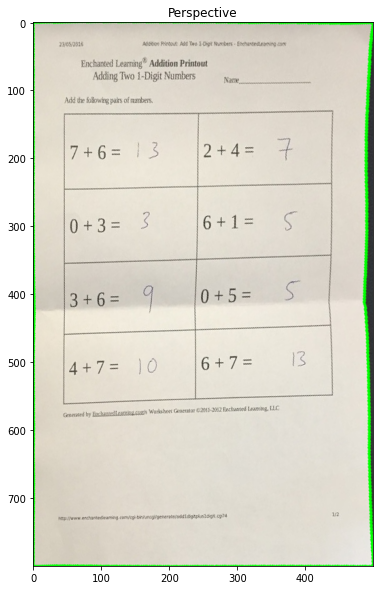

In [9]:
inputPts = np.float32(approx)

outputPts = np.float32([[0,0],
                        [0,800],
                        [500,800],
                        [500,0]])

M = cv2.getPerspectiveTransform(inputPts, outputPts)

dst = cv2.warpPerspective(image, M, (500,800))
imshow("Perspective", dst)

In [5]:
image = cv

NameError: ignored